<a href="https://colab.research.google.com/github/Shruti-lab/EPL_dataAnalysis/blob/main/Exploratory_Data_Analysis_in_Python(EPL_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploratory Data Analysis in Python**

##Dataset used is data from English Premier League between 2000 and 2022

The dataset contains following columns:

- `Season` - Season of football league (years)
- `Pos`: final position that season
- `Team`: name of team
- `Pld`: Number of matches played
- `W`: Number of wins
- `D`: Number of draws
- `L`: Number of losses
- `GF`: Goals scored that season
- `GA`: Goals conceded that seasom
- `GD`: Difference in goals scored vs. conceded
- `Pts`: Total points at end of season
- `Qualification or Relegation`: result at end of season

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

In [38]:
epl = pd.read_csv('/content/EPL.csv')
epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Season                       440 non-null    object
 1   Pos                          440 non-null    int64 
 2   Team                         440 non-null    object
 3   Pld                          440 non-null    int64 
 4   W                            440 non-null    int64 
 5   D                            440 non-null    int64 
 6   L                            440 non-null    int64 
 7   GF                           440 non-null    int64 
 8   GA                           440 non-null    int64 
 9   GD                           440 non-null    int64 
 10  Pts                          440 non-null    int64 
 11  Qualification or relegation  440 non-null    object
dtypes: int64(9), object(3)
memory usage: 41.4+ KB


In [37]:
epl.head(10)

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a]
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a]
5,2000-01,6,Chelsea,38,17,10,11,68,45,23,61,Qualification for the UEFA Cup first round[a]
6,2000-01,7,Sunderland,38,15,12,11,46,41,5,57,Not Applicable
7,2000-01,8,Aston Villa,38,13,15,10,46,43,3,54,Qualification for the Intertoto Cup third round
8,2000-01,9,Charlton Athletic,38,14,10,14,50,57,-7,52,Not Applicable
9,2000-01,10,Southampton,38,14,10,14,40,48,-8,52,Not Applicable


In [17]:
epl.shape

(440, 12)

In [70]:
epl_condensed = epl[['Season','Team','Pos','Pts','GF','GD','Qualification or relegation']]
epl_condensed.head(5)

,Season,Team,Pos,Pts,GF,GD,Qualification or relegation
0,2000-01,Manchester United,1,80,79,48,Qualification for the Champions League first g...
1,2000-01,Arsenal,2,70,63,25,Qualification for the Champions League first g...
2,2000-01,Liverpool,3,69,71,32,Qualification for the Champions League third q...
3,2000-01,Leeds United,4,68,64,21,Qualification for the UEFA Cup first round[a]
4,2000-01,Ipswich Town,5,66,57,15,Qualification for the UEFA Cup first round[a]


## Cleaning up Qualification column to make it less wordy hence easier to read

In [66]:
#function for same
def update_qualification_column(pdSeries):
    if 'Champions League' in pdSeries:
        return 'Champions League'
    elif 'Europa' in pdSeries or 'UEFA' in pdSeries:
        return 'Europa'
    elif 'Relegation' in pdSeries:
        return 'Relegated'
    else:
        return '-'


In [71]:
epl_condensed = epl_condensed.rename(columns = {'Qualification or relegation':'Results'})  #renaming column (rename function is applied only of dataframes not series)
epl_condensed['Results'] = epl_condensed['Results'].apply(update_qualification_column)  #applying function to every row
epl_condensed.head()


# update_qualification_column(epl_condensed[['Qualification or relegation']])   #can also do this way

# Lesser efficient method to do same (getting warning SettingWithCopyWarning)
# for i in t:
#   if 'Champions League' in i:
#     epl_condensed['Qualification or relegation']='Nan'
#   else:
#     epl_condensed['Qualification or relegation']='-'

,Season,Team,Pos,Pts,GF,GD,Results
0,2000-01,Manchester United,1,80,79,48,Champions League
1,2000-01,Arsenal,2,70,63,25,Champions League
2,2000-01,Liverpool,3,69,71,32,Champions League
3,2000-01,Leeds United,4,68,64,21,Europa
4,2000-01,Ipswich Town,5,66,57,15,Europa


In [72]:
epl_condensed['Results'].value_counts()

-                   220
Champions League     89
Europa               68
Relegated            63
Name: Results, dtype: int64

In [73]:
# dfp = e[['Season']]  #this is dataframe
# ds = e['Season']  #this is panda series

In [76]:
cl_qual = epl_condensed.loc[epl_condensed['Results']=='Champions League']
# cl_qual = epl_condensed[epl_condensed.Result == 'Champions League']
cl_qual

,Season,Team,Pos,Pts,GF,GD,Results
0,2000-01,Manchester United,1,80,79,48,Champions League
1,2000-01,Arsenal,2,70,63,25,Champions League
2,2000-01,Liverpool,3,69,71,32,Champions League
20,2001-02,Arsenal,1,87,79,43,Champions League
21,2001-02,Liverpool,2,80,67,37,Champions League
...,...,...,...,...,...,...,...
403,2020-21,Chelsea,4,67,58,22,Champions League
420,2021-22,Manchester City,1,93,99,73,Champions League
421,2021-22,Liverpool,2,92,94,68,Champions League
422,2021-22,Chelsea,3,74,76,43,Champions League


In [79]:
#Finding maximum position, minimum points and minimum goal difference of Champion League qualifiers every Season
cl_qual_stats = cl_qual.groupby('Season').agg({'Pos':'max','Pts':'min','GD':'min'})
cl_qual_stats

,Pos,Pts,GD
Season,,,
2000-01,3,69,25
2001-02,4,71,22
2002-03,4,67,15
2003-04,4,60,18
2004-05,5,58,-1
2005-06,4,67,32
2006-07,4,68,28
2007-08,4,76,39
2008-09,4,72,31


In [86]:
#Finding maximum position, minimum points and minimum goal difference of Europa League Qualifiers  every Season
eu_qual = epl_condensed[epl_condensed['Results']=='Europa']
print(eu_qual.head())
eu_qual_stats = eu_qual.groupby('Season').agg({'Pos':'max','Pts':'min','GD':'min'})

     Season          Team  Pos  Pts  GF  GD Results
3   2000-01  Leeds United    4   68  64  21  Europa
4   2000-01  Ipswich Town    5   66  57  15  Europa
5   2000-01       Chelsea    6   61  68  23  Europa
24  2001-02  Leeds United    5   66  53  16  Europa
25  2001-02       Chelsea    6   64  66  28  Europa


In [85]:

eu_qual_stats

,Pos,Pts,GD
Season,,,
2000-01,6,61,15
2001-02,18,36,-23
2002-03,9,51,-7
2003-04,11,48,-8
2004-05,7,55,5
2005-06,9,55,-3
2006-07,7,56,-5
2007-08,11,46,-8
2008-09,7,53,5


from matplotlib import pyplot as plt
_df_0['Pos'].plot(kind='hist', bins=20, title='Pos')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Pts'].plot(kind='hist', bins=20, title='Pts')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['GD'].plot(kind='hist', bins=20, title='GD')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Pos', y='Pts', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Pts', y='GD', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Pos'].plot(kind='line', figsize=(8, 4), title='Pos')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Pts'].plot(kind='line', figsize=(8, 4), title='Pts')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['GD'].plot(kind='line', figsize=(8, 4), title='GD')
plt.gca().spines[['top', 'right']].set_visible(False)

In [88]:
epl_winners = epl_condensed[epl_condensed['Pos']==1]
epl_winners = epl_winners.reset_index(drop=True)
epl_winners

,Season,Team,Pos,Pts,GF,GD,Results
0,2000-01,Manchester United,1,80,79,48,Champions League
1,2001-02,Arsenal,1,87,79,43,Champions League
2,2002-03,Manchester United,1,83,74,40,Champions League
3,2003-04,Arsenal,1,90,73,47,Champions League
4,2004-05,Chelsea,1,95,72,57,Champions League
5,2005-06,Chelsea,1,91,72,50,Champions League
6,2006-07,Manchester United,1,89,83,56,Champions League
7,2007-08,Manchester United,1,87,80,58,Champions League
8,2008-09,Manchester United,1,90,68,44,Champions League
9,2009-10,Chelsea,1,86,103,71,Champions League


In [91]:
relegation_zone = epl_condensed[epl_condensed['Pos']==18]
relegation_zone = relegation_zone.reset_index(drop=True)
relegation_zone

,Season,Team,Pos,Pts,GF,GD,Results
0,2000-01,Manchester City,18,34,41,-24,Relegated
1,2001-02,Ipswich Town,18,36,41,-23,Europa
2,2002-03,West Ham United,18,42,42,-17,Relegated
3,2003-04,Leicester City,18,33,48,-17,Relegated
4,2004-05,Crystal Palace,18,33,41,-21,Relegated
5,2005-06,Birmingham City,18,34,28,-22,Relegated
6,2006-07,Sheffield United,18,38,32,-23,Relegated
7,2007-08,Reading,18,36,41,-25,Relegated
8,2008-09,Newcastle United,18,34,40,-19,Relegated
9,2009-10,Burnley,18,30,42,-40,Relegated


<Figure size 2000x400 with 0 Axes>

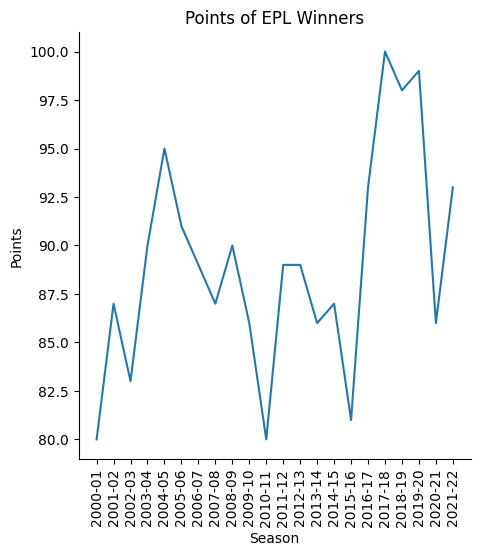

In [107]:
plt.figure(figsize=(20,4))
sns.relplot(x='Season', y='Pts',data=epl_winners,kind='line',markers=True)
plt.xticks(rotation=90)
plt.title('Points of EPL Winners')
plt.xlabel('Season')
plt.ylabel('Points')
plt.show()

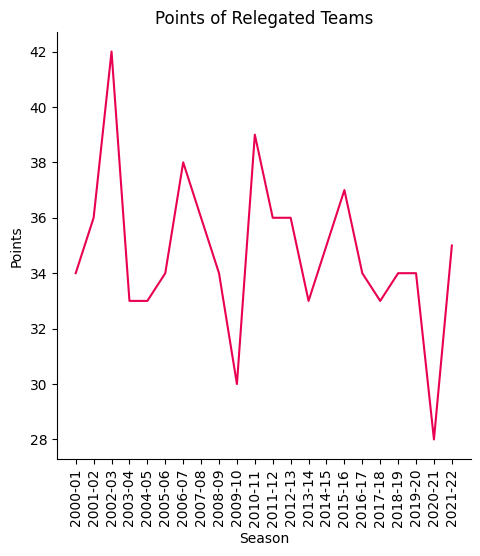

In [113]:
sns.relplot(x='Season', y='Pts',data=relegation_zone,kind='line',markers='o',color='#e90052',errorbar='sd')
plt.xticks(rotation=90)
plt.title('Points of Relegated Teams')
plt.xlabel('Season')
plt.ylabel('Points')
plt.show()

In [109]:
print(epl_winners.Pts.sub(relegation_zone.Pts).mean())
print(epl_winners.Pts.corr(relegation_zone.Pts))

54.31818181818182
-0.31466918678660794
